Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Connect to Drive if needed

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load **X_train, y_train, X_val, y_val, X_test** and **y_test** from **source_path**

In [3]:
source_path = "/content/drive/MyDrive"

In [4]:
X_train = np.load(f"{source_path}/X_train.npy")
X_test = np.load(f"{source_path}/X_test.npy")
X_val = np.load(f"{source_path}/X_val.npy")
y_train = np.load(f"{source_path}/y_train.npy")
y_test = np.load(f"{source_path}/y_test.npy")
y_val = np.load(f"{source_path}/y_val.npy")

In [5]:
print(X_test[4].shape)

(64, 64, 1)


Create a *Sequential* **model**

In [56]:
model = tf.keras.Sequential()

Add **2D** layers

In [57]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(4,4),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(2,2),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(2,2),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))

Add **Flatten** layer

In [58]:
model.add(tf.keras.layers.Flatten())

Add **Dense** and **Dropout** layers

In [59]:
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_regularizer="L2"))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(64, activation="relu", kernel_regularizer="L2"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Compile the **model**

In [60]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

Train the **model**

In [61]:
results = model.fit(X_train, y_train,
          batch_size=128,
          epochs=60,
          validation_data=(X_val, y_val))

Epoch 1/60
41/41 [==============================] - 3s 55ms/step - loss: 5.5933 - accuracy: 0.1187 - val_loss: 4.2885 - val_accuracy: 0.1214
Epoch 2/60
41/41 [==============================] - 2s 47ms/step - loss: 4.0038 - accuracy: 0.1195 - val_loss: 3.7413 - val_accuracy: 0.1694
Epoch 3/60
41/41 [==============================] - 2s 47ms/step - loss: 3.5468 - accuracy: 0.1466 - val_loss: 3.2701 - val_accuracy: 0.2032
Epoch 4/60
41/41 [==============================] - 2s 47ms/step - loss: 3.2197 - accuracy: 0.1783 - val_loss: 2.9807 - val_accuracy: 0.2307
Epoch 5/60
41/41 [==============================] - 2s 48ms/step - loss: 3.0027 - accuracy: 0.1833 - val_loss: 2.7925 - val_accuracy: 0.3205
Epoch 6/60
41/41 [==============================] - 2s 48ms/step - loss: 2.8132 - accuracy: 0.2110 - val_loss: 2.6506 - val_accuracy: 0.2753
Epoch 7/60
41/41 [==============================] - 2s 48ms/step - loss: 2.6903 - accuracy: 0.2134 - val_loss: 2.4870 - val_accuracy: 0.3417
Epoch 8/60
41

Test the **model**

In [62]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 7ms/step - loss: 0.8058 - accuracy: 0.8769


[0.8058210015296936, 0.87693190574646]

Visualize **loss** graph 

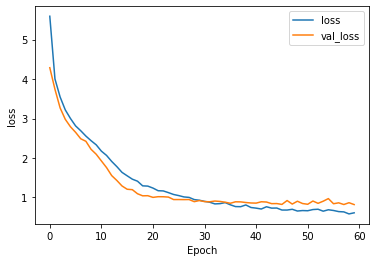

In [63]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

Visualize **accuracy** graph

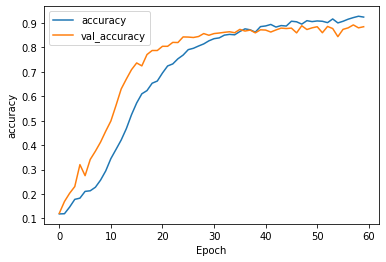

In [64]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

Try a prediction

In [67]:
test_index = 4
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[test_index].reshape(1,64,64,1))
correct_result = y_test[test_index]

# Print the prediction result
print(prediction_result)

[[1.5675084e-03 4.0395471e-06 1.2680747e-05 5.6565998e-05 1.8196512e-05
  9.9818039e-01 5.9109343e-08 5.4513817e-05 8.5635424e-05 2.0404290e-05]]


In [68]:
print(correct_result)
# Find the predicted class
print(prediction_result.argmax())

# Find the prediction probability
print(prediction_result.max())

5.0
5
0.9981804
